# Fundamentos Electronica Digital

In [7]:
import schemdraw
import schemdraw.elements as elm
from schemdraw import logic

## Circuito Serie

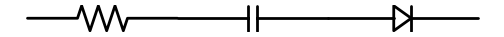

In [4]:
with schemdraw.Drawing() as d:
    d.add(elm.Resistor())
    d.add(elm.Capacitor())
    d.add(elm.Diode())

## Contador 555

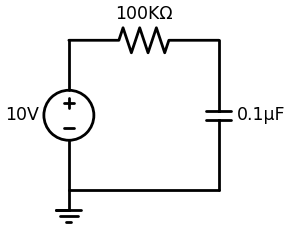

In [5]:
with schemdraw.Drawing() as d:
    d += elm.Resistor().label('100KΩ')
    d += elm.Capacitor().down().label('0.1μF', loc='bottom')
    d += elm.Line().left()
    d += elm.Ground()
    d += elm.SourceV().up().label('10V')

## Circuito Digital

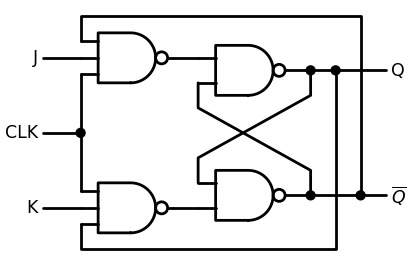

In [8]:
with schemdraw.Drawing() as d:
    # Two front gates (SR latch)
    d += (G1 := logic.Nand(leadout=.75).anchor('in1'))
    d += logic.Line().length(d.unit/2).label('Q', 'right')
    d.move_from(G1.in1, dy=-2.5)
    d += (G2 := logic.Nand(leadout=.75).anchor('in1'))
    d += logic.Line().length(d.unit/2).label('$\overline{Q}$', 'right')
    d += logic.Wire('N', k=.5).at(G2.in1).to(G1.out).dot()
    d += logic.Wire('N', k=.5).at(G1.in2).to(G2.out).dot()

    # Two back gates
    d += logic.Line().left(d.unit/6).at(G1.in1)
    d += (J := logic.Nand(inputs=3).anchor('out').right())
    d += logic.Wire('n', k=.5).at(J.in1).to(G2.out, dx=1).dot()
    d += logic.Line().left(d.unit/4).at(J.in2).label('J', 'left')
    d += logic.Line().left(d.unit/6).at(G2.in2)
    d += (K := logic.Nand(inputs=3).right().anchor('out'))
    d += logic.Wire('n', k=-.5).at(K.in3).to(G1.out, dx=.5).dot()
    d += logic.Line().left(d.unit/4).at(K.in2).label('K', 'left')
    d += (C := logic.Line().at(J.in3).toy(K.in1))
    d += logic.Dot().at(C.center)
    d += logic.Line().left(d.unit/4).label('CLK', 'left')